In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
path = '../workflow/results/causalrivers_run1/summary/results.csv'
df = pd.read_csv(path)

In [3]:
df.head()

,id,dataset,resolution,scenario,seed,subsample,repeat,AUROC,F1,Recall,Precision,runtime,lag,sum,lambda_a,lambda_w,w_thres,alpha
0,dummy,causalrivers,1D,close_3,0,1,1,0.777778,0.666667,0.666667,0.666667,0.000164,NaN,NaN,NaN,NaN,NaN,NaN
1,dummy,causalrivers,1D,close_3,1,1,1,1.000000,1.000000,1.000000,1.000000,0.000159,NaN,NaN,NaN,NaN,NaN,NaN
2,dummy,causalrivers,1D,close_3,2,1,1,0.777778,0.666667,0.666667,0.666667,0.000167,NaN,NaN,NaN,NaN,NaN,NaN
3,dummy,causalrivers,1D,close_3,3,1,1,1.000000,1.000000,1.000000,1.000000,0.000147,NaN,NaN,NaN,NaN,NaN,NaN
4,dummy,causalrivers,1D,close_3,4,1,1,0.950000,0.800000,1.000000,0.666667,0.000212,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
def res2hour(x):
    if x['resolution'].endswith('h'):
        return float(x['resolution'].split('h')[0])
    elif x['resolution'].endswith('D'):
        return float(x['resolution'][0]) * 24.0
    else:
        return float(x['resolution'][:2])/60.0

In [5]:
df['resolution_float'] = df.apply(res2hour, axis=1)

## AUROC

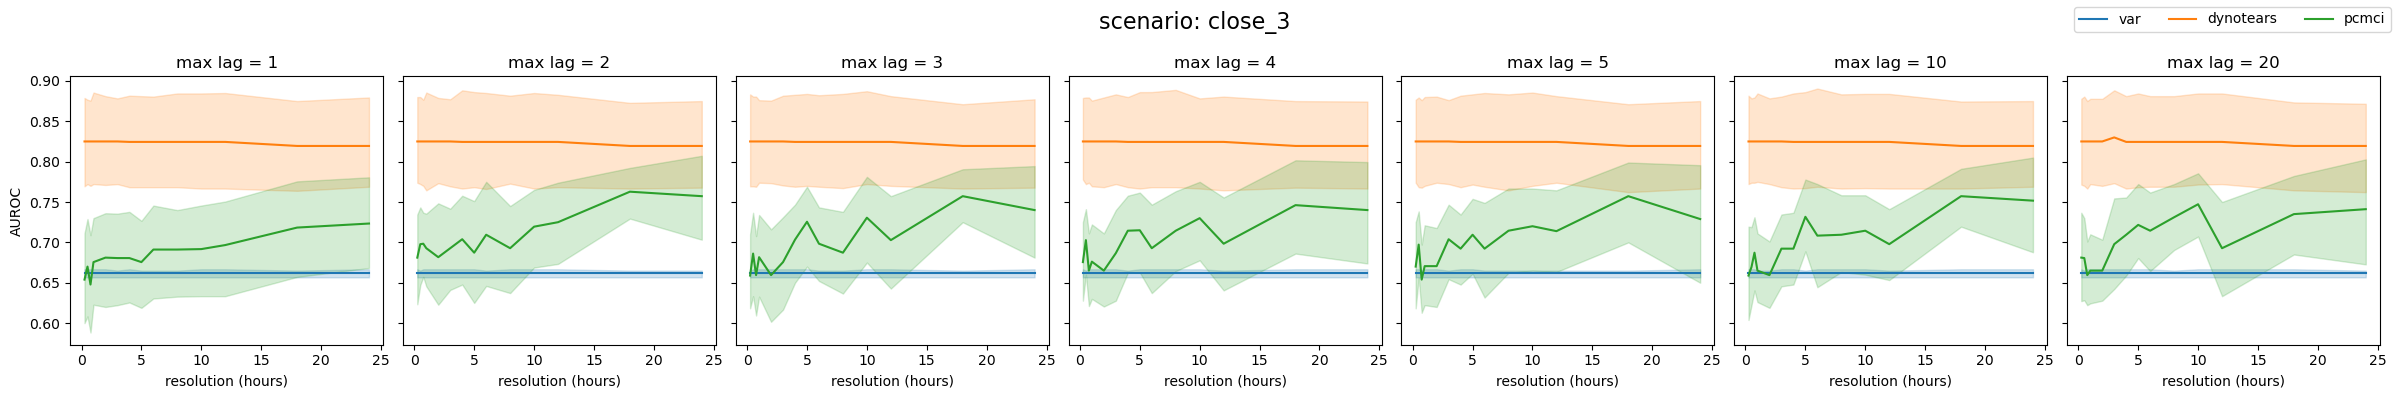

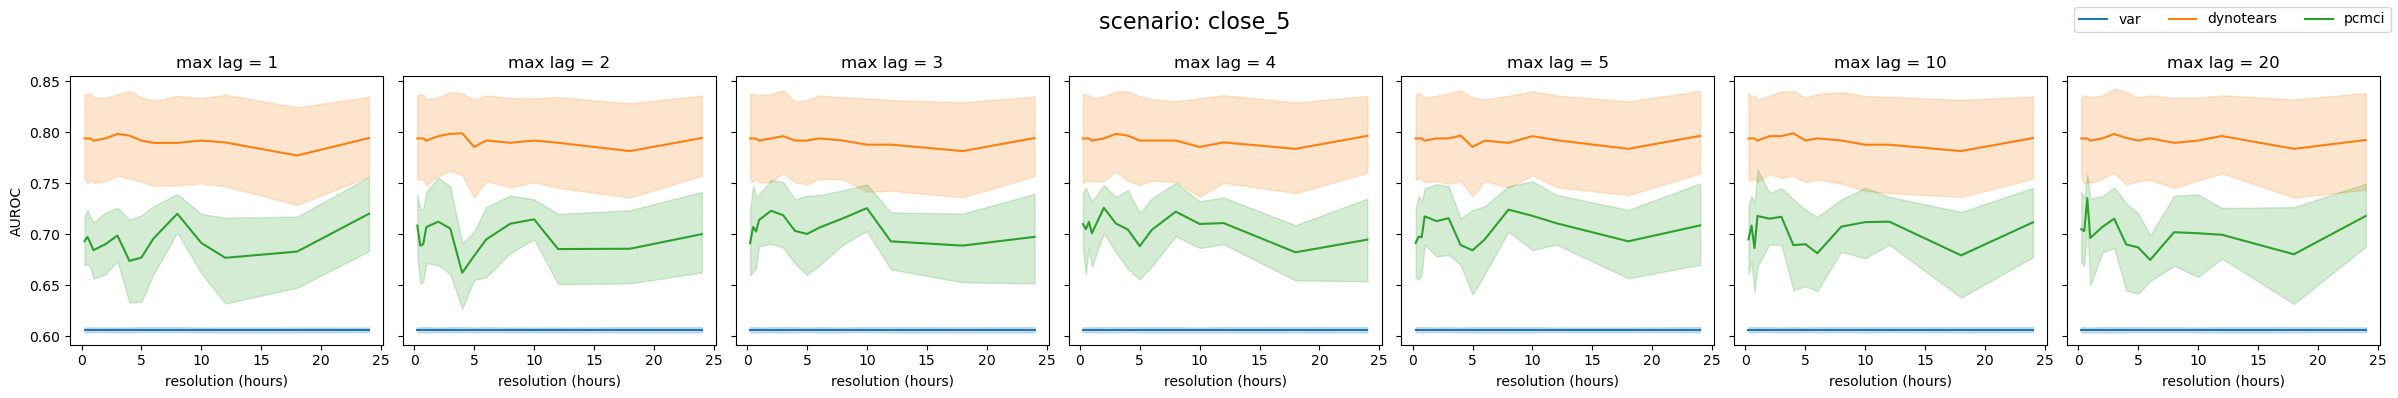

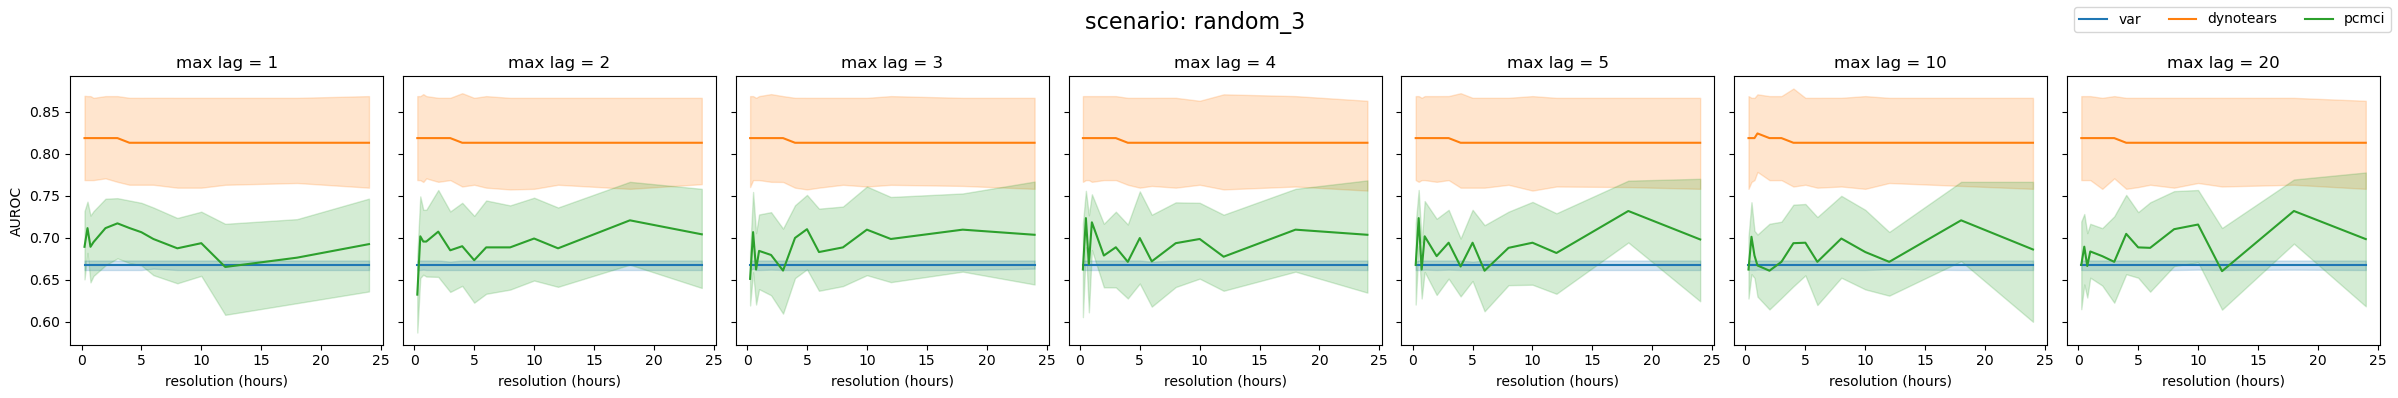

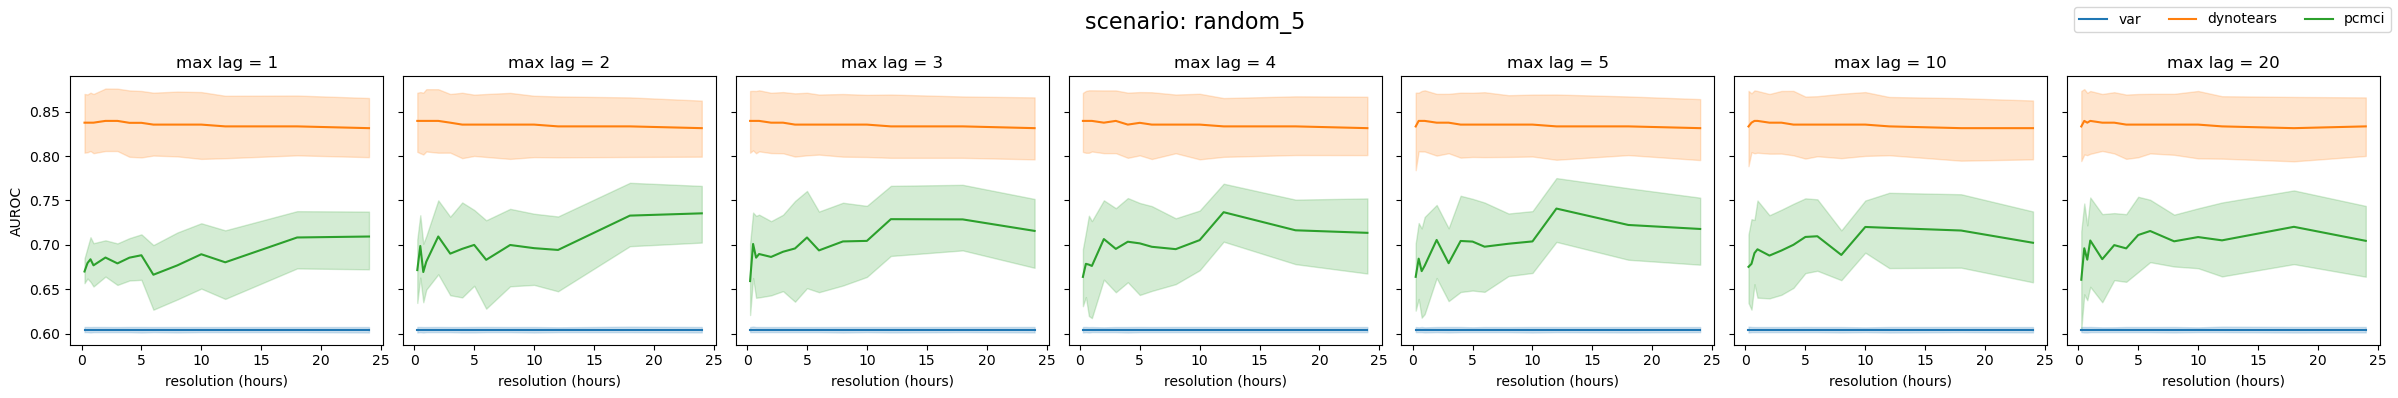

In [48]:
metric = 'AUROC'
lags = df[~df['lag'].isnull()]['lag'].unique()
n_lags = len(lags)
last_lag = lags[-1]
scenarios = ['close_3', 'close_5', 'random_3', 'random_5']

for s in scenarios:
    fig, axs = plt.subplots(nrows=1, ncols=n_lags, figsize=(24, 4), sharey=True)

    for l, ax in zip(lags, axs):
        df_local = df[(df['lag'] == l) & (df['scenario'] == s)]
        plot_legend = last_lag == l
        sns.lineplot(df_local, x='resolution_float', y=metric, hue='id', ax=ax, legend=plot_legend)
        ax.set_xlabel('resolution (hours)')
        ax.set_title(f"max lag = {int(l)}")
        if plot_legend:
            ax.get_legend().remove()

    fig.legend(ncol=3)
    fig.suptitle(f"scenario: {s}", fontsize=16)
    plt.tight_layout()


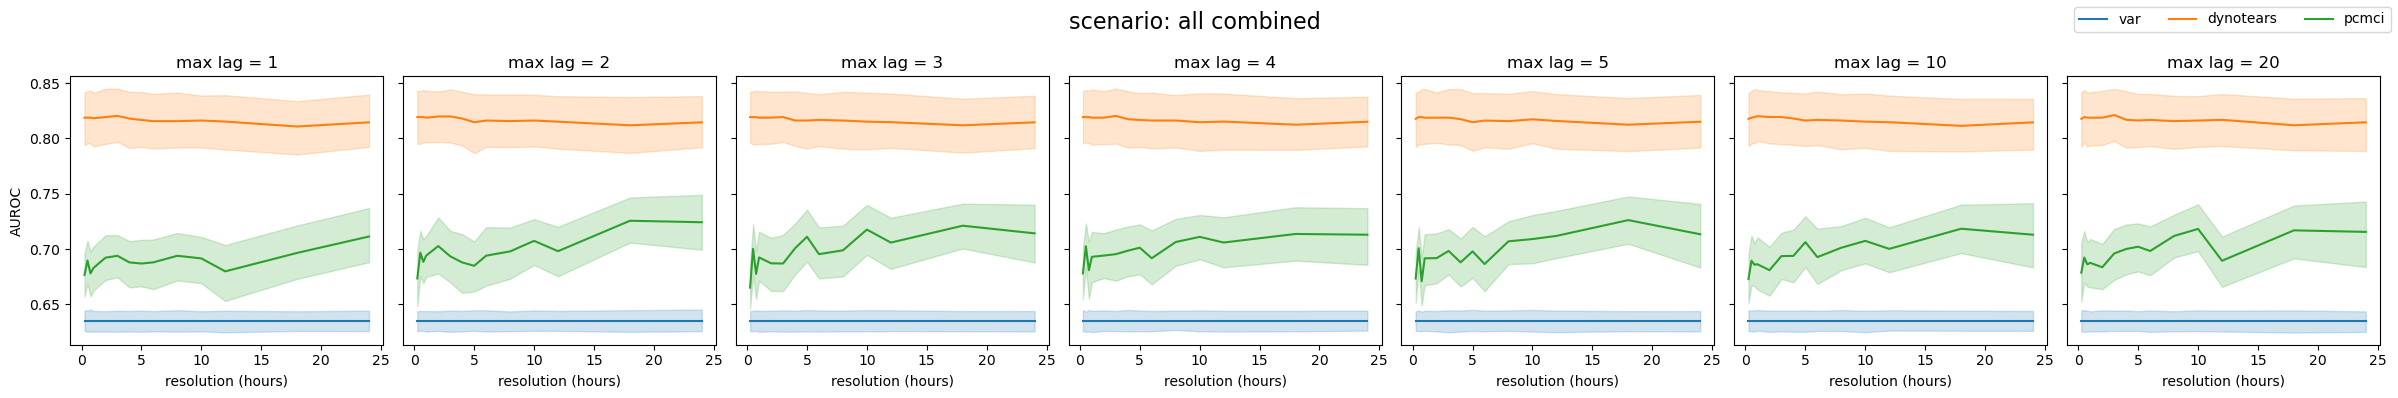

In [50]:
lags = df[~df['lag'].isnull()]['lag'].unique()
n_lags = len(lags)
last_lag = lags[-1]

fig, axs = plt.subplots(nrows=1, ncols=n_lags, figsize=(24, 4), sharey=True)

for l, ax in zip(lags, axs):
    df_local = df[(df['lag'] == l)]
    plot_legend = last_lag == l
    sns.lineplot(df_local, x='resolution_float', y='AUROC', hue='id', ax=ax, legend=plot_legend)
    ax.set_xlabel('resolution (hours)')
    ax.set_title(f"max lag = {int(l)}")
    if plot_legend:
        ax.get_legend().remove()

fig.legend(ncol=3)
fig.suptitle(f"scenario: all combined", fontsize=16)
plt.tight_layout()


## F1

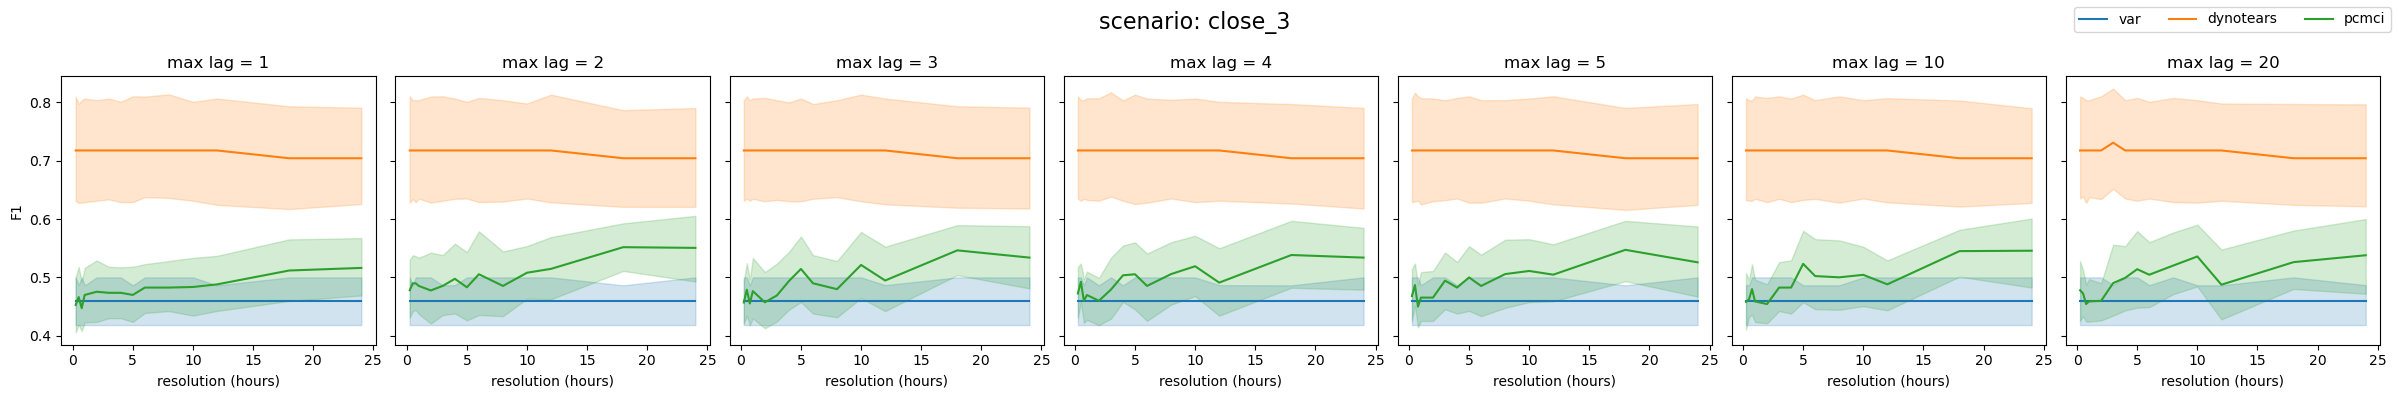

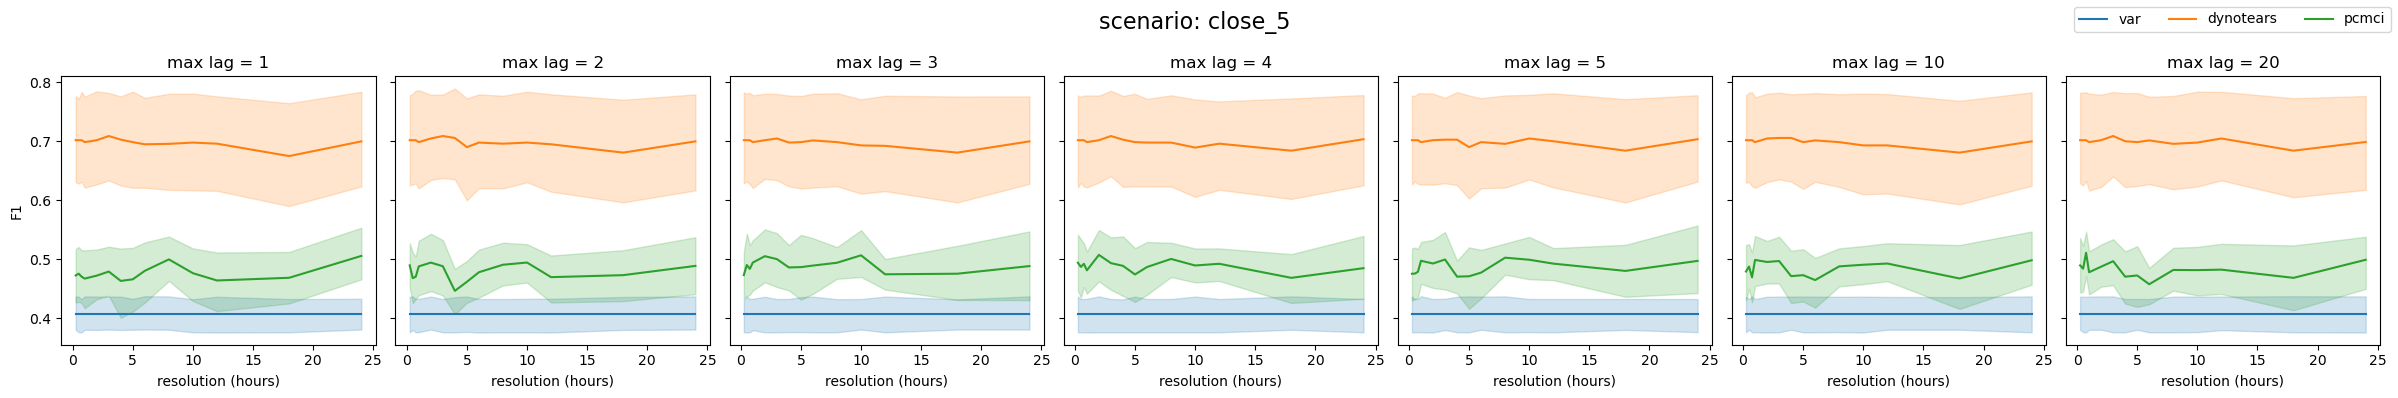

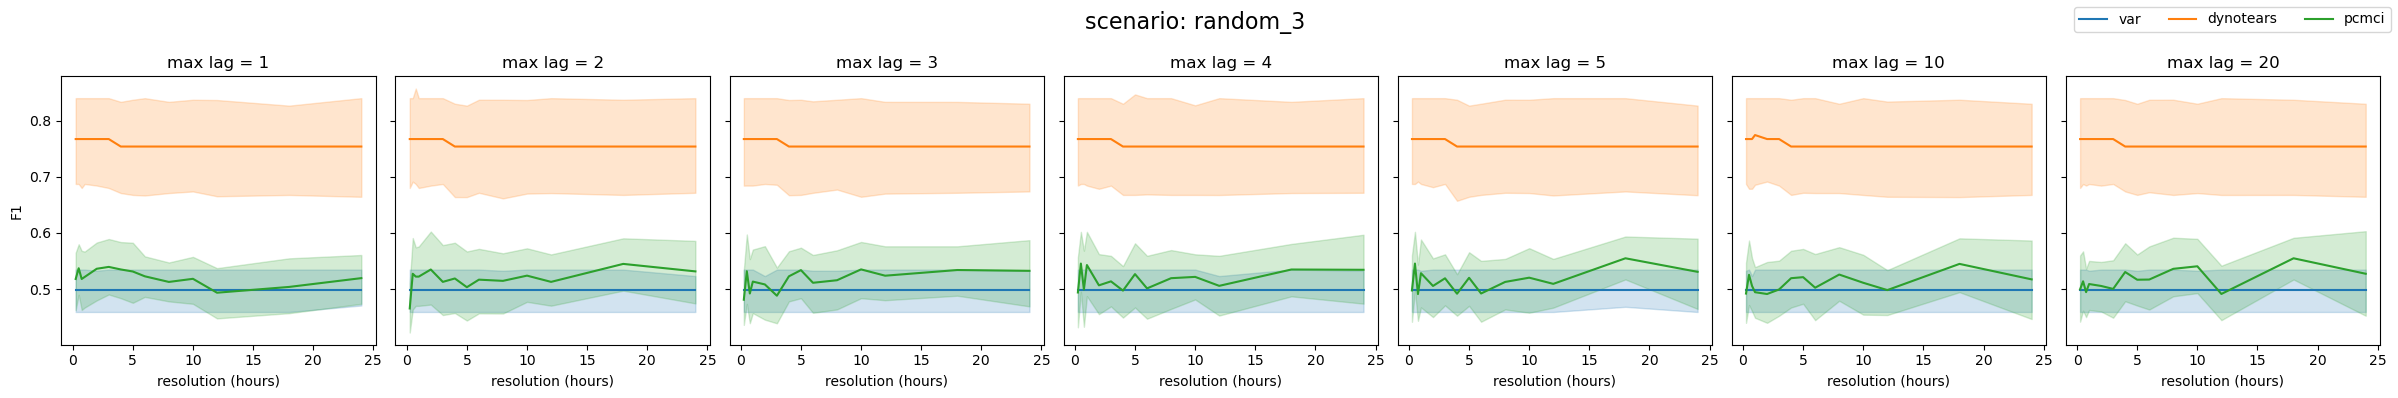

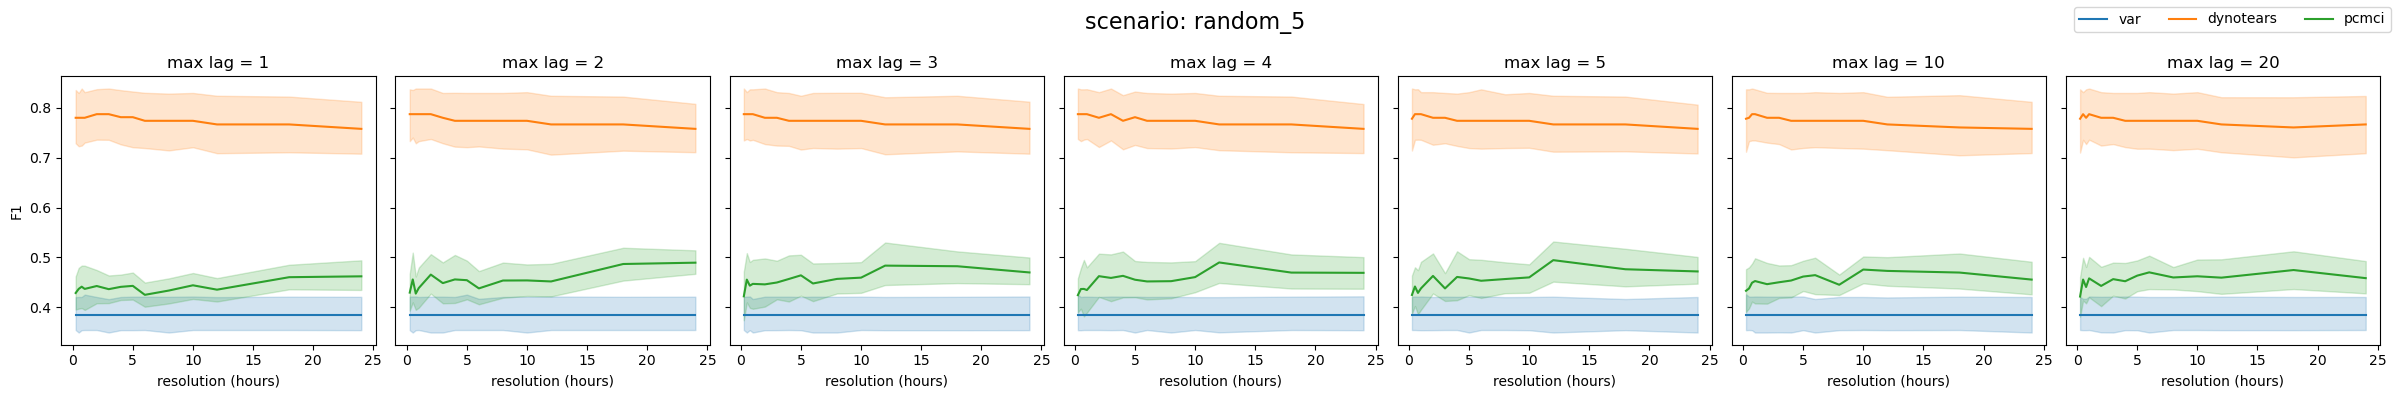

In [6]:
metric = 'F1'
lags = df[~df['lag'].isnull()]['lag'].unique()
n_lags = len(lags)
last_lag = lags[-1]
scenarios = ['close_3', 'close_5', 'random_3', 'random_5']

for s in scenarios:
    fig, axs = plt.subplots(nrows=1, ncols=n_lags, figsize=(24, 4), sharey=True)

    for l, ax in zip(lags, axs):
        df_local = df[(df['lag'] == l) & (df['scenario'] == s)]
        plot_legend = last_lag == l
        sns.lineplot(df_local, x='resolution_float', y=metric, hue='id', ax=ax, legend=plot_legend)
        ax.set_xlabel('resolution (hours)')
        ax.set_title(f"max lag = {int(l)}")
        if plot_legend:
            ax.get_legend().remove()

    fig.legend(ncol=3)
    fig.suptitle(f"scenario: {s}", fontsize=16)
    plt.tight_layout()


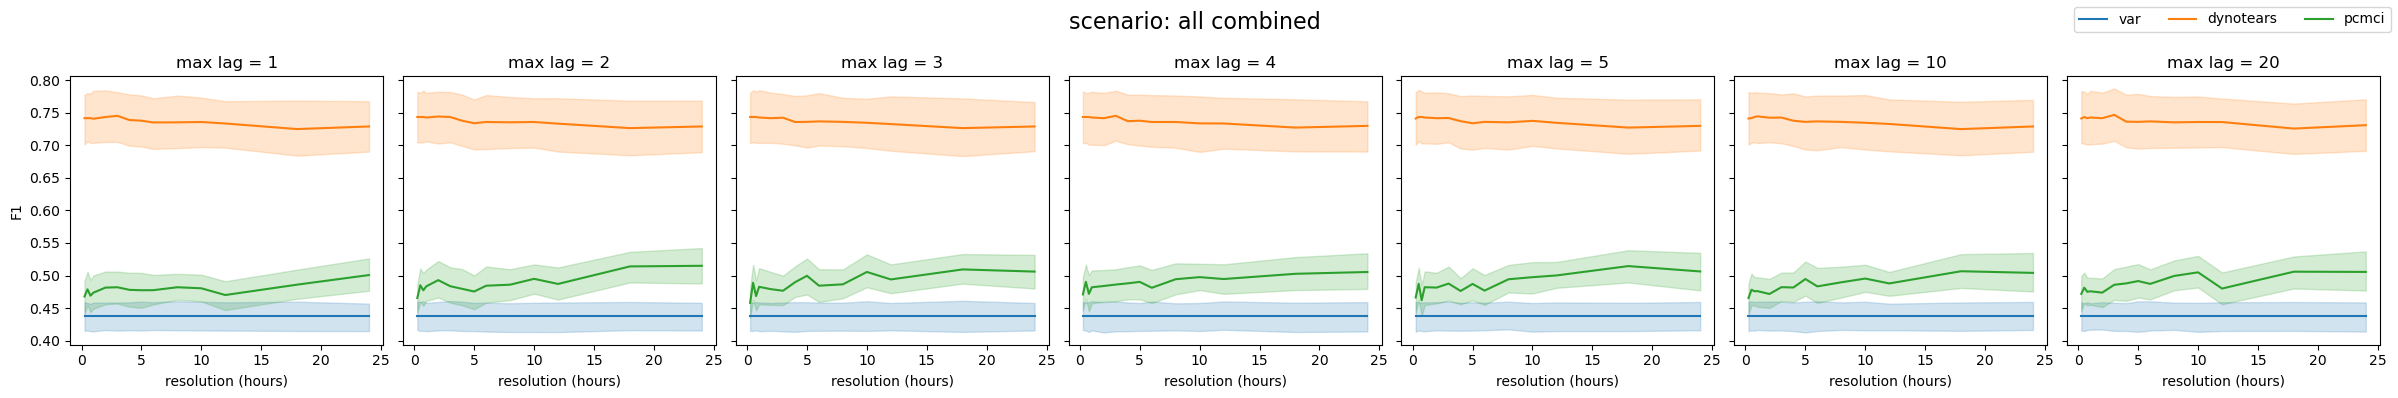

In [7]:
metric = 'F1'
lags = df[~df['lag'].isnull()]['lag'].unique()
n_lags = len(lags)
last_lag = lags[-1]

fig, axs = plt.subplots(nrows=1, ncols=n_lags, figsize=(24, 4), sharey=True)

for l, ax in zip(lags, axs):
    df_local = df[(df['lag'] == l)]
    plot_legend = last_lag == l
    sns.lineplot(df_local, x='resolution_float', y=metric, hue='id', ax=ax, legend=plot_legend)
    ax.set_xlabel('resolution (hours)')
    ax.set_title(f"max lag = {int(l)}")
    if plot_legend:
        ax.get_legend().remove()

fig.legend(ncol=3)
fig.suptitle(f"scenario: all combined", fontsize=16)
plt.tight_layout()


## Recall

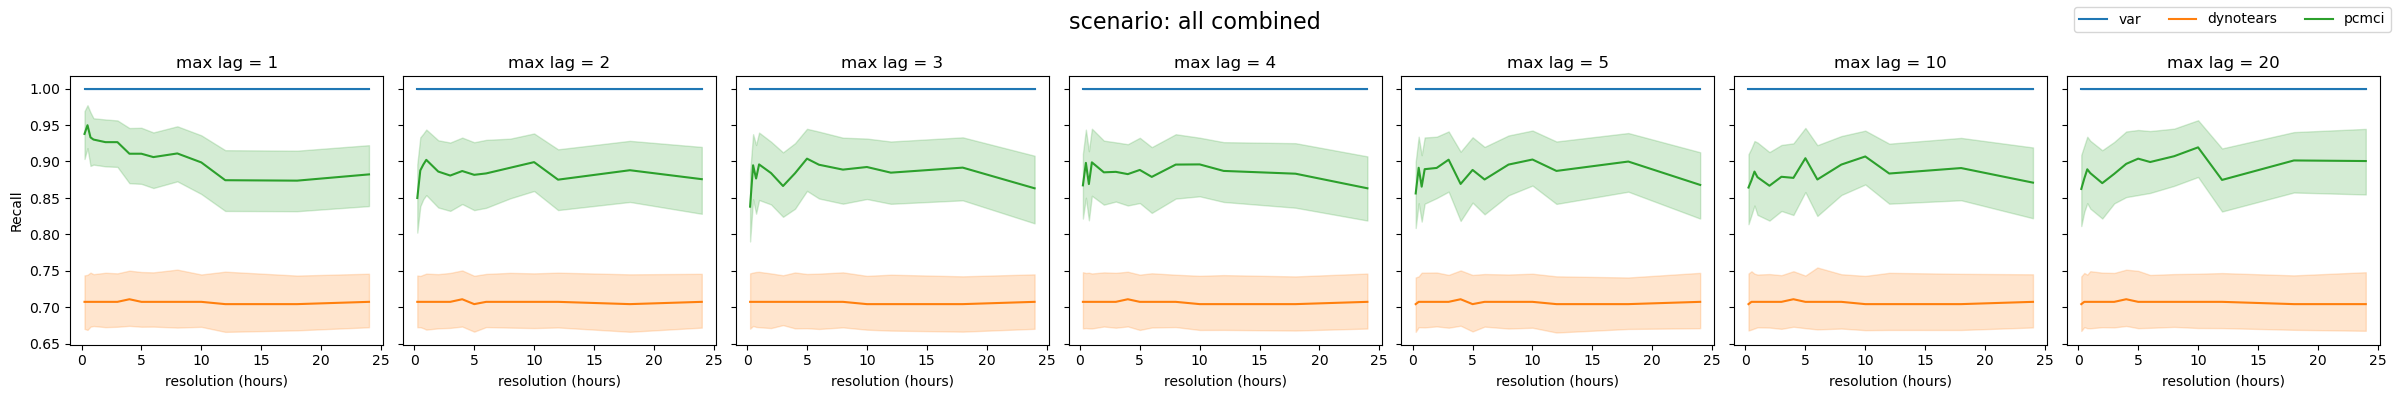

In [8]:
metric = 'Recall'
lags = df[~df['lag'].isnull()]['lag'].unique()
n_lags = len(lags)
last_lag = lags[-1]

fig, axs = plt.subplots(nrows=1, ncols=n_lags, figsize=(24, 4), sharey=True)

for l, ax in zip(lags, axs):
    df_local = df[(df['lag'] == l)]
    plot_legend = last_lag == l
    sns.lineplot(df_local, x='resolution_float', y=metric, hue='id', ax=ax, legend=plot_legend)
    ax.set_xlabel('resolution (hours)')
    ax.set_title(f"max lag = {int(l)}")
    if plot_legend:
        ax.get_legend().remove()

fig.legend(ncol=3)
fig.suptitle(f"scenario: all combined", fontsize=16)
plt.tight_layout()


## Precision

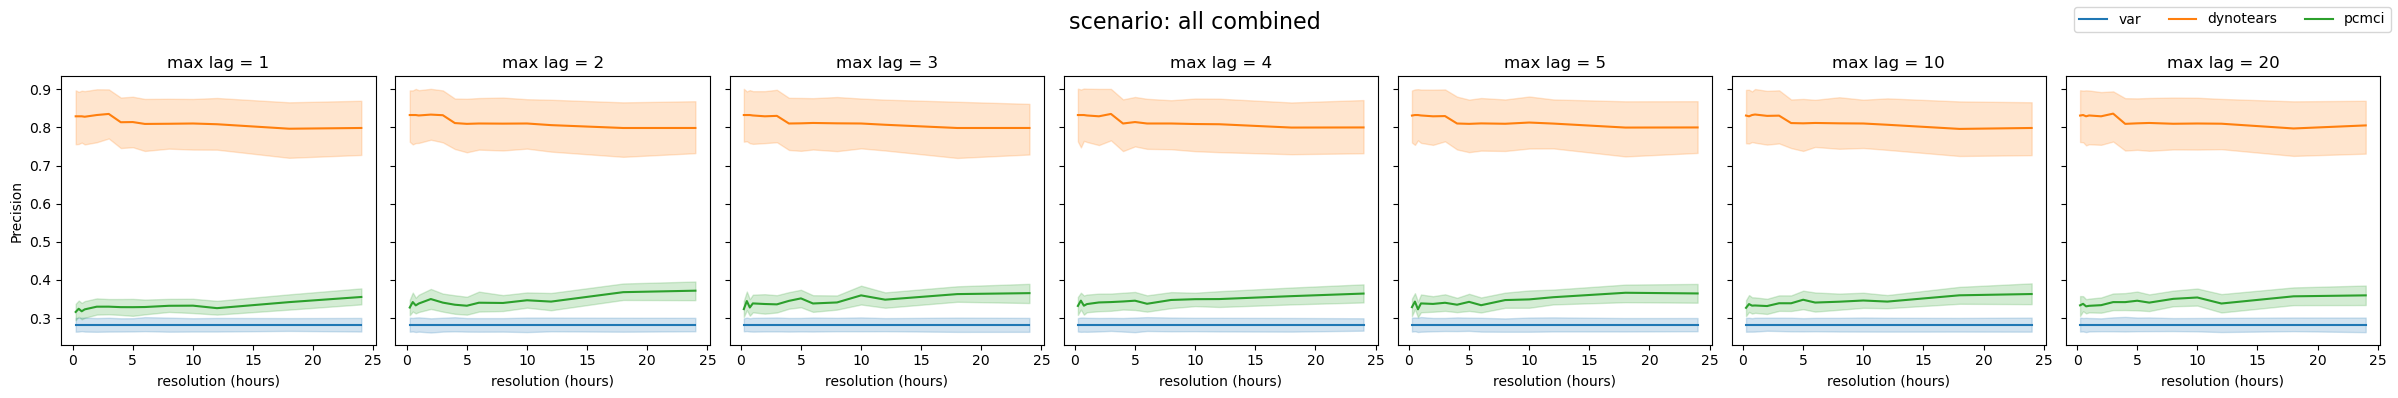

In [9]:
metric = 'Precision'
lags = df[~df['lag'].isnull()]['lag'].unique()
n_lags = len(lags)
last_lag = lags[-1]

fig, axs = plt.subplots(nrows=1, ncols=n_lags, figsize=(24, 4), sharey=True)

for l, ax in zip(lags, axs):
    df_local = df[(df['lag'] == l)]
    plot_legend = last_lag == l
    sns.lineplot(df_local, x='resolution_float', y=metric, hue='id', ax=ax, legend=plot_legend)
    ax.set_xlabel('resolution (hours)')
    ax.set_title(f"max lag = {int(l)}")
    if plot_legend:
        ax.get_legend().remove()

fig.legend(ncol=3)
fig.suptitle(f"scenario: all combined", fontsize=16)
plt.tight_layout()


In [7]:
df_avg = df[df['lag'] > 0]
df_auroc = df_avg.groupby(['id', 'resolution_float', 'lag'], as_index=False)['AUROC'].mean()
df_f1 = df_avg.groupby(['id', 'resolution_float', 'lag'], as_index=False)['F1'].mean()

In [36]:
df_auroc

,id,resolution_float,lag,AUROC
0,dynotears,0.25,1.0,0.825000
1,dynotears,0.25,2.0,0.825000
2,dynotears,0.25,3.0,0.825000
3,dynotears,0.25,4.0,0.825000
4,dynotears,0.25,5.0,0.825000
...,...,...,...,...
130,var,6.00,1.0,0.661667
131,var,6.00,2.0,0.661667
132,var,6.00,3.0,0.661667
133,var,6.00,4.0,0.661667


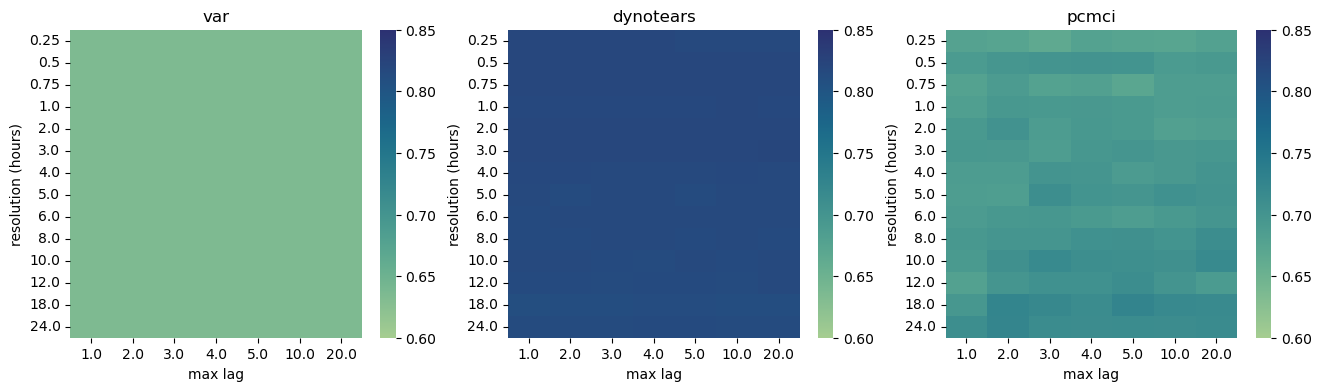

In [15]:
algs = ['var', 'dynotears', 'pcmci']

fig, axs = plt.subplots(nrows=1, ncols=len(algs), figsize=(16,4))

for ax, alg in zip(axs, algs):
    df_l = df_auroc[df_auroc['id'] == alg]
    df_heat = df_l.pivot(index='resolution_float', columns='lag', values='AUROC')
    sns.heatmap(df_heat, ax=ax, vmin=0.6, vmax=0.85, cmap='crest')
    ax.set_title(alg)
    ax.set_xlabel('max lag')
    ax.set_ylabel('resolution (hours)')

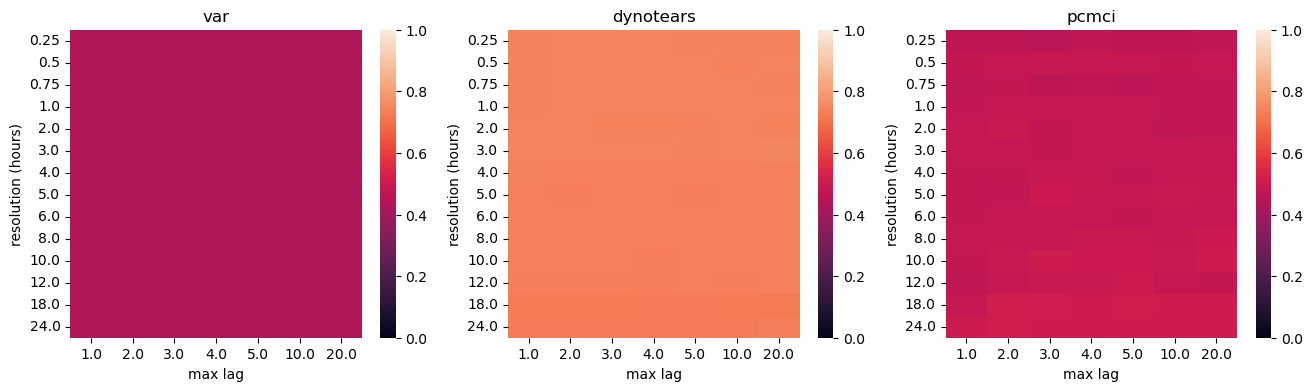

In [12]:
algs = ['var', 'dynotears', 'pcmci']

fig, axs = plt.subplots(nrows=1, ncols=len(algs), figsize=(16,4))

for ax, alg in zip(axs, algs):
    df_l = df_f1[df_f1['id'] == alg]
    df_heat = df_l.pivot(index='resolution_float', columns='lag', values='F1')
    sns.heatmap(df_heat, ax=ax, vmin=0.0, vmax=1.0)
    ax.set_title(alg)
    ax.set_xlabel('max lag')
    ax.set_ylabel('resolution (hours)')

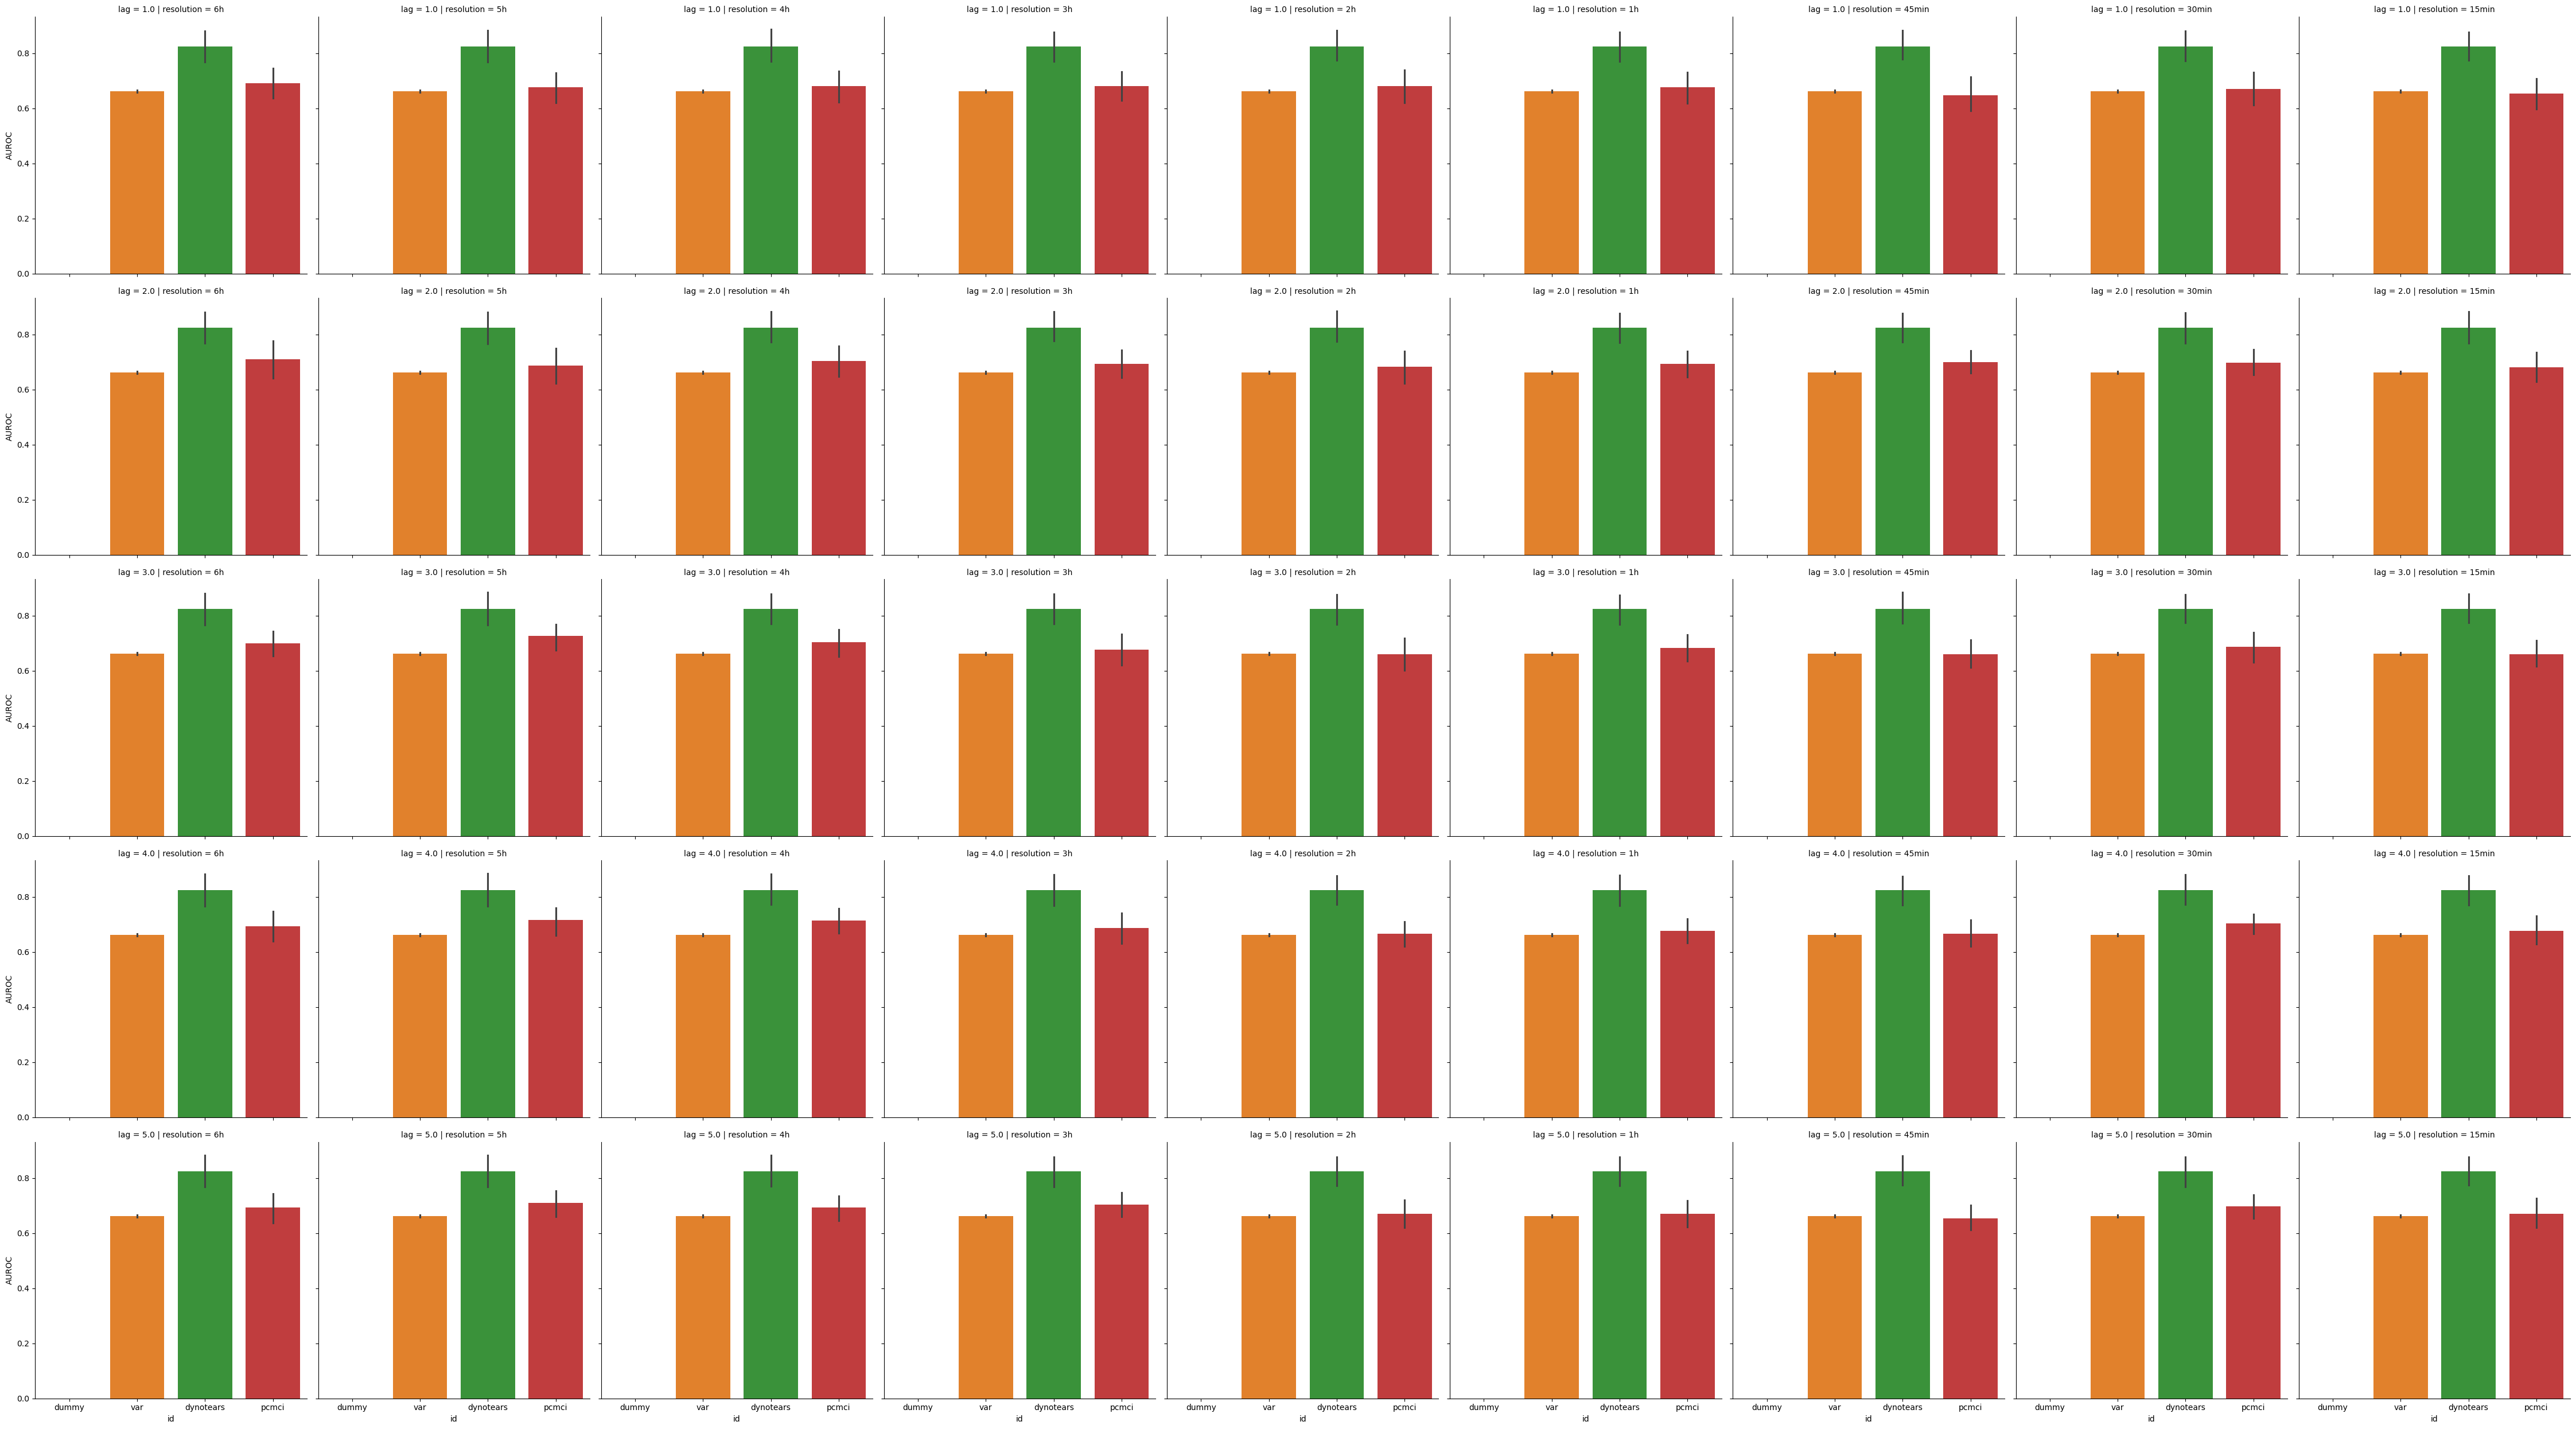

In [16]:
#sns.catplot(data=df, x='id', y='AUROC', col='resolution', row='lag', kind='bar', hue='id')